## Table of Contents

1. <a href ="#1.-Challenge">Challenge</a>
2. <a href ="#2.-Evaluation-Metric">Evaluation Metric</a>
3. <a href ="#3.-Comet-Experiment">Comet Experiment Initialisation</a>
4. <a href ="#4.-Importing-Libraries">Importing Libraries</a>
5. <a href ="#5.- Reading the Datasets"> Reading the Datasets</a>
6. <a href ="#6.-Data Description & Summary Statistics">Data Description & Summary Statistics</a>
7. <a href ="#7.-Exploratory-Data-Analysis"> Exploratory Data Analysis</a>
8. <a href ="#8.-Data-Preprocessing">Data Preprocessing</a>
9. <a href ="#9.-Building-a-Recommendation-model">Building a Recommendation model</a>
10. <a href ="#11.-Data Engineering ">Data Engineering </a>
11. <a href ="#11.-The Chosen Model Summary and Conclusion">The Chosen Model Summary and Conclusion</a>
12. <a href ="#12.-Submission">Submission</a>
13. <a href ="#12.-Pickle file generation">Pickle File Generation</a>  


## 1. Challenge


## 2. Evaluation Metric

## 3. Comet Experiment Initialisation

## 4. Importing Libraries

In [1]:
# Install packages here

# Package we need fore Comet
from comet_ml import Experiment

# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# Package for timing code
import timeit


# Packages for visualization
import matplotlib
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")


# Packages for modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from sklearn.neighbors import  NearestNeighbors
import heapq

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Packages for Randomisation
import random
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## 5. Reading the Datasets

In [2]:
import os
os.chdir('C:/Users/Jenipher/OneDrive/Documents/GitHub/unsupervised_movie_data')

In [3]:
movies_df = pd.read_csv('movies.csv') 
imdb_df = pd.read_csv('imdb_data.csv')
genome_score = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
tags_df = pd.read_csv('tags.csv')
links_df = pd.read_csv('links.csv')
sample_submission_df = pd.read_csv('sample_submission.csv') 

Above we have the following datasets
* genome_scores.csv - a score mapping the strength between movies and tag-related properties.
* genome_tags.csv - user assigned tags for genome-related scores.
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.


## 6. Data Description & Summary Statistics

__train and test data info and shape__

In [4]:
display(train_df.head(3))

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


In [5]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


None

In [6]:
print(train_df.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [7]:
# View test data info, shape and content  
display(test_df.head(3))
display(test_df.info()) # Get the summary of the dataset's metadata
print(test_df.isnull().sum()) # check if there are any null values)

,userId,movieId
0,1,2011
1,1,4144
2,1,5767


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


None

userId     0
movieId    0
dtype: int64


further analysis of the training set

In [128]:
print("Total Train Data:")
print("Total number of movie ratings in Train data = "+str(train_df.shape[0]))
print("Number of unique users in Train data = "+str(len(np.unique(train_df["userId"]))))
print("Number of unique movies in Train data = "+str(len(np.unique(train_df["movieId"]))))
print("Highest value of a User ID = "+str(max(train_df["userId"].values)))
print("Highest value of a Movie ID = "+str(max(train_df["movieId"].values)))

Total Train Data:
Total number of movie ratings in Train data = 10000038
Number of unique users in Train data = 162541
Number of unique movies in Train data = 48213
Highest value of a User ID = 162541
Highest value of a Movie ID = 209171


__movies data__

In [8]:
# View movies data info and shape and content head 
display(movies_df.head())
movies_df.info() 
print(movies_df.isnull().sum()) 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
movieId    0
title      0
genres     0
dtype: int64


__Genome Scores and tags__

The tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.
The file genome-scores.csv contains movie-tag relevance data in the following format:

movieId,tagId,relevance
The second file, genome-tags.csv, provides the tag descriptions for the tag IDs in the genome file, in the following format:

tagId,tag

In [9]:
genome_tags.info() 
genome_score.info() 
display(genome_tags.head()) 
print(genome_tags.isnull().sum())
print(genome_tags.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


tagId    0
tag      0
dtype: int64
tagId    0
tag      0
dtype: int64


In [10]:
# Count the number of unique entries for features of interest
unique_movies = len(movies_df['movieId'].unique().tolist())
unique_tags = len(tags_df['tag'].unique().tolist())
unique_users = len(train_df['userId'].unique().tolist())
unique_directors = len(imdb_df['director'].unique().tolist())
unique_actors = len(imdb_df['title_cast'].unique().tolist())

# Create a dataframe to store the number of unique entries for features of interest
unique = pd.DataFrame({"movies": [unique_movies],
                       "tags" : [unique_tags],
                       "users": [unique_users],
                       "directors" : [unique_directors],
                       "actors" : [unique_actors]}, index=['unique_entries'])

print('number of unique entries for features of interest')
display(unique.transpose())

# Determine and display the min and max ratings received
min_rating = train_df.rating.min()
max_rating = train_df.rating.max()
print('Lowest rating: {}'.format(min_rating))
print('Highest rating: {}'.format(max_rating))


number of unique entries for features of interest


,unique_entries
movies,62423
tags,73051
users,162541
directors,11787
actors,17144


Lowest rating: 0.5
Highest rating: 5.0


__Imdb database of movies__


In [11]:
display(imdb_df.head()) 
display(imdb_df.info()) 
print(imdb_df.isnull().sum())

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


None

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


There are 62423 movies in the movies database and only 27278 in the imdb dataset.
The IMBD dataset gives more infomation to about 27000+ movies present in the train dataset. The features are title_cast, director, runtime, budget as well plot_keywords. The title_cast feature describes the most famous/paid actors/actresses in the movie and runtime describes how long movie was and plot_keyword describes the most important key words of the plot

There are alot of missing values in this  data frame,to invesitage further we will look into the dataframes column by column to a clear description of the dataset by looking at the count, perecntage of missing values aswell as the datatype for each column.

In [126]:
print(f'The imdb dataset has {imdb_df.shape[0]} rows/entries and {len(imdb_df.columns)} columns')
percentange=imdb_df.isnull().mean().round(4) * 100
count = imdb_df.isnull().sum()
count_percentage = pd.DataFrame({'Count':count,'Percentage': percentange,'data_type':imdb_df.dtypes},
                                index=imdb_df.columns)
count_percentage

The imdb dataset has 27278 rows/entries and 6 columns


,Count,Percentage,data_type
movieId,0,0.00,int64
title_cast,10068,36.91,object
director,9874,36.20,object
runtime,12089,44.32,float64
budget,19372,71.02,object
plot_keywords,11078,40.61,object


It appears that most of the columns in the Dataset has over 25 % of missing values, meaning that our dataset has caputured only 75% or less information from the real world data. Missing Values is a common occurance when dealing with real world data. There are various ways to handle missing values the most effective technique being imputing missing values with either a 0 or using aggregate methods such as mean and median.

## 7. Exploratory Data Analysis

##### Ratings and users

Using the train dataset, we can get an overview of how each user was rated for each movie. What was observed was that each user can rate a movie from 0.5 (Worst) to 5.0 (Best). Here is the full detailed scale:
 * 0.5 - Very Bad
 * 1.0 - Bad
 * 1.5 - Moderately Bad
 * 2.0 - Not that Bad
 * 2.5 - Less than average 
 * 3.0 - Average 
 * 3.5 - Above than average 
 * 4.0 - Good
 * 4.5 - Very Good
 * 5.0 - Excellent 
 <br>

__which users have rated the most movies__

In [12]:
def user_ratings_count(df, n):
    """
    Counts the number of user ratings.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        n (int): number of users to show
    Returns
    -------
        barplot (NoneType): barplot of top n users by number of observations
    Example
    -------
        >>> df = pd.DataFrame({'userId':[1,2,3,1,2,4,5,4]})
        >>> user_ratings_count(df, 3)
            NoneType (barplot)
    """
    plt.figure(figsize=(8,6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='brg', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

Combined number of ratings:	 34398 
Total number of movies:		 48213


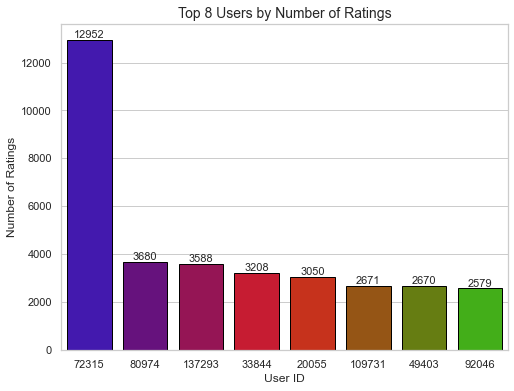

In [13]:
user_ratings_count(train_df,8)

The user 72315 has rated a lot of movies compared to the other users,we will remove this user for EDA purposes

In [78]:
eda_df = train_df[train_df['userId']!=72315]

Combined number of ratings:	 23734 
Total number of movies:		 45844


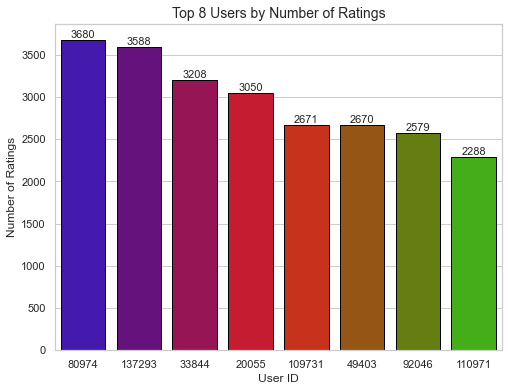

In [15]:
user_ratings_count(eda_df,8)

In [16]:

print("No of ratings lost:\t",34398-23734)
print("Movies rated by user 72315:\t",48213-45844)

No of ratings lost:	 10664
Movies rated by user 72315:	 2369


__What is the distribution of ratings from worst to best__

In [17]:
def ratings_distplot(df, column='rating'):
    """
    Plots the distribution of ratings in the dataset.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        column (str): column to plot
    Returns
    -------
        distplot (NoneType): distplot of rating frequencies
    """
    plt.figure(figsize=(8,6))
    ax = sns.distplot(df[f'{column}'],bins=10, kde=False, hist_kws=dict(alpha=0.6),color="#4D17A0")
    mean = df[f'{column}'].mean()
    median = df[f'{column}'].median()
    plt.axvline(x=mean, label = f'mean {round(mean,2)}' , color='#4D17A0', lw=3, ls = '--')
    plt.axvline(x=median, label = f'median {median}' , color='#4DA017', lw=3, ls = '--')
    plt.xlim((0.5,5))
    plt.ylim((0,2500000))
    plt.title(f'Distribution of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

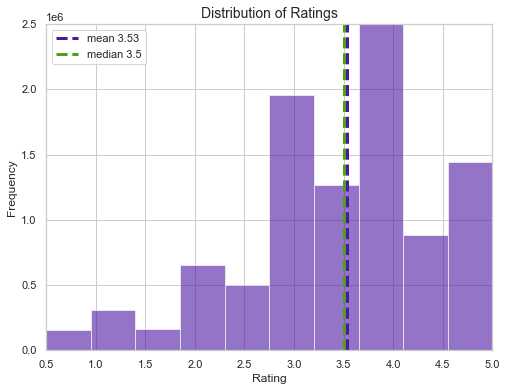

In [18]:
ratings_distplot(eda_df)

Here it can be seen that most people tend to only give positive reviews

__what percentage of movies were rated in each category__

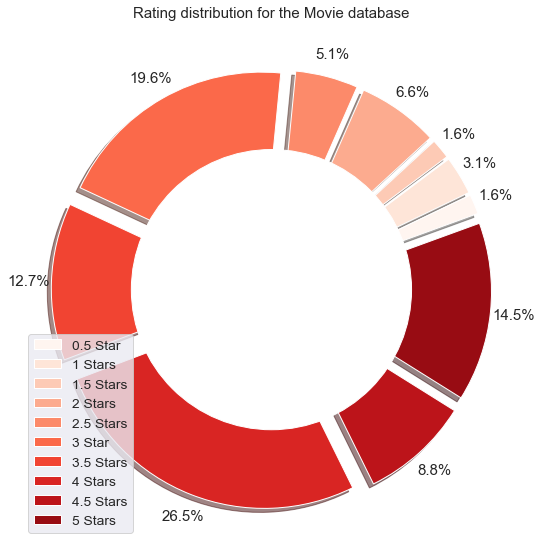

In [131]:
# Merge train with movies to join movie titles and ratings 
ratings = train_df.merge(movies_df, on='movieId', how='inner')

# Count how many ratings are in each category OO
grouped = pd.DataFrame(ratings.groupby(['rating'])['title'].count())
grouped.rename(columns={'title':'rating_count'}, inplace=True)

# Creating plots 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(122)
    
# Create colour palette
labels = ['0.5 Star', '1 Stars', '1.5 Stars', '2 Stars', '2.5 Stars', '3 Star', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
theme = plt.get_cmap('Reds')
ax.set_prop_cycle("color", [theme(1. * i / len(labels))
                                 for i in range(len(labels))])
sns.set(font_scale=1.25)

# Create pie chart
pie = ax.pie(grouped['rating_count'],
                 autopct='%1.1f%%',
                 shadow=True,
                 startangle=20,
                 pctdistance=1.115,
                 explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
   
# Turn pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display donut plot with legend
plt.legend(pie[0], labels, loc="lower left")
ax.set_title('Rating distribution for the Movie database\n', fontsize=15)
plt.tight_layout()
plt.show()

This chart can be explained the fact that people only tend to rate the movies that they like. In other words, if a user doesn't like a movie, it is unlikely that they will watch it through to the end,and therefore they will not rate it.

__Now let us look if there is a relationship between the number of movies rated and the rating given by a user__

In [20]:
def mean_ratings_scatter(df, color='#4DA017', column='userId'):
    """
    Make scatterplots of mean ratings.
    
    """
    plt.figure(figsize=(6,4))
    mean_ratings = df.groupby(f'{column}')['rating'].mean()
    user_counts = df.groupby(f'{column}')['movieId'].count().values
    sns.scatterplot(x=mean_ratings, y = user_counts, color=color)
    plt.title(f'Mean Ratings by Number of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Number of Ratings')
    plt.show()

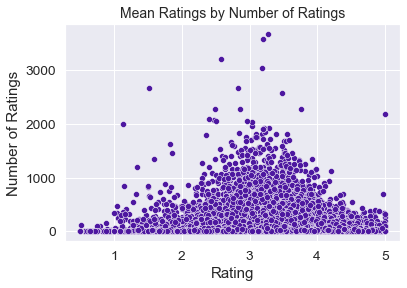

In [21]:
mean_ratings_scatter(eda_df,'#4D17A0')

There is no correlation seen between the number of ratings and the ratings given.

__Runtime__

From its humble beginnings of 1 minute silent, black & white clips to epic 3 hour visual delights, movies have a come a long way in terms of runtime. In this section, let us try and gain some additional insights about the nature of movie lengths and their evolution over time.

<AxesSubplot:xlabel='runtime', ylabel='Density'>

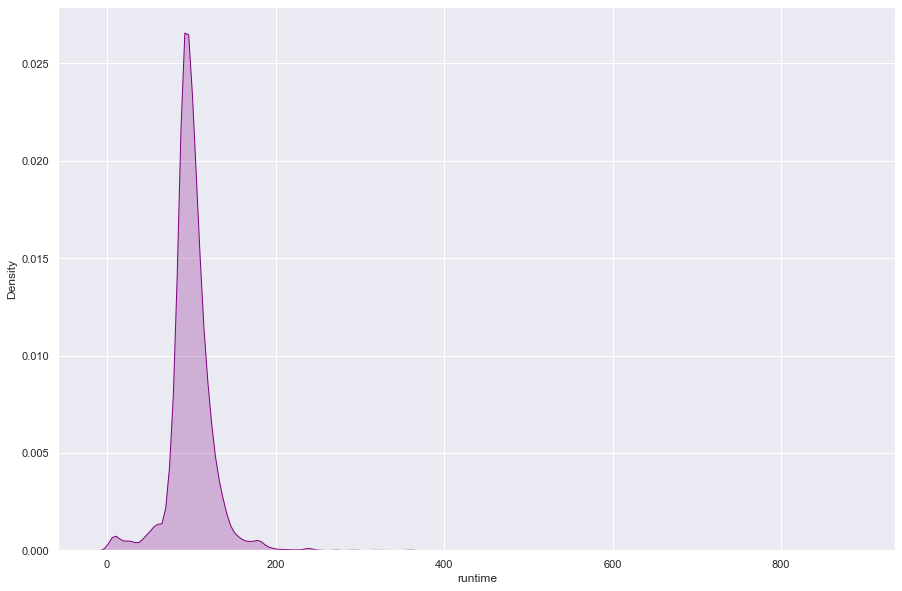

In [36]:
#Plot the Runtime
sns.set(style="darkgrid", )
sns.kdeplot(data=imdb_df['runtime'], shade=True, color='purple')

let us do a descriptive analysis to make more sense of our graph above.

In [38]:
# Describe the runtime 
imdb_df['runtime'].describe()

count    15189.000000
mean       100.312331
std         31.061707
min          1.000000
25%         89.000000
50%         98.000000
75%        109.000000
max        877.000000
Name: runtime, dtype: float64

Here it can be seen that the average length of a movie is 1hr 40 minutes ,with the longest one having 877minutes and we also have a film film as short as 1 minute. 

##### Genres

__The most common Genres observed__

In [22]:
def feature_frequency(df, column):
    """
    Function to count the number of occurences of metadata such as genre
    Parameters
    
    -------
        
    """
    # Creat a dict to store values
    df = df.dropna(axis=0)
    genre_dict = {f'{column}': list(),
                 'count': list(),}
    # Retrieve a list of all possible genres
    print('retrieving features...')
    for movie in range(len(df)):
        gens = df[f'{column}'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict[f'{column}']:
                genre_dict[f'{column}'].append(gen)
    # count the number of occurences of each genre
    print('counting...')
    for genre in genre_dict[f'{column}']:
        count = 0
        for movie in range(len(df)):
            gens = df[f'{column}'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
        
        # Calculate metrics
    data = pd.DataFrame(genre_dict)
    print('done!')
    return data
genres = feature_frequency(movies_df, 'genres')

retrieving features...
counting...
done!


In [23]:
def feature_count(df, column):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(y = df[f'{column}'], x = df['count'], palette='brg', orient='h')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel(f'{column}')
    plt.xlabel('Count')
    plt.show()

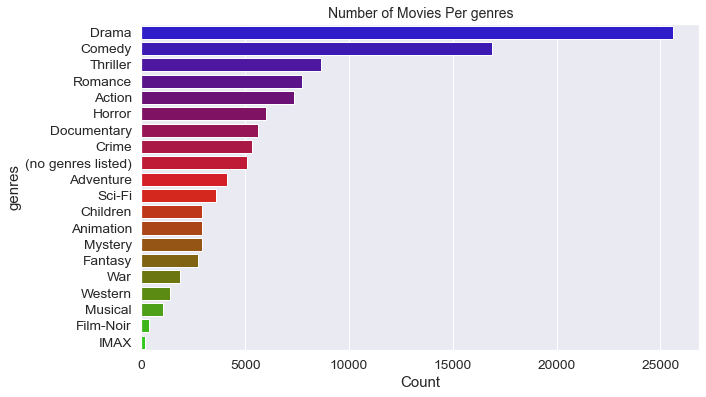

In [24]:
feature_count(genres.sort_values(by = 'count', ascending=False), 'genres')

Here we can see about 5000 movies have no Genres listed.Drama can also be seen as the most frequent genre in the databaseComedy comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres in the top 10 are Thriller, Romance,Action, Horror, Documentary and Crime.
IMAX is not a genre but rather a proprietary system for mass-viewings.

We can use the IMDB and TMDB ID's together with the APIs to fill missing data. 

__The above figure does not tell us anything about the popularity of the genres, lets look at the most popular movies in a particular time based on their ratings__

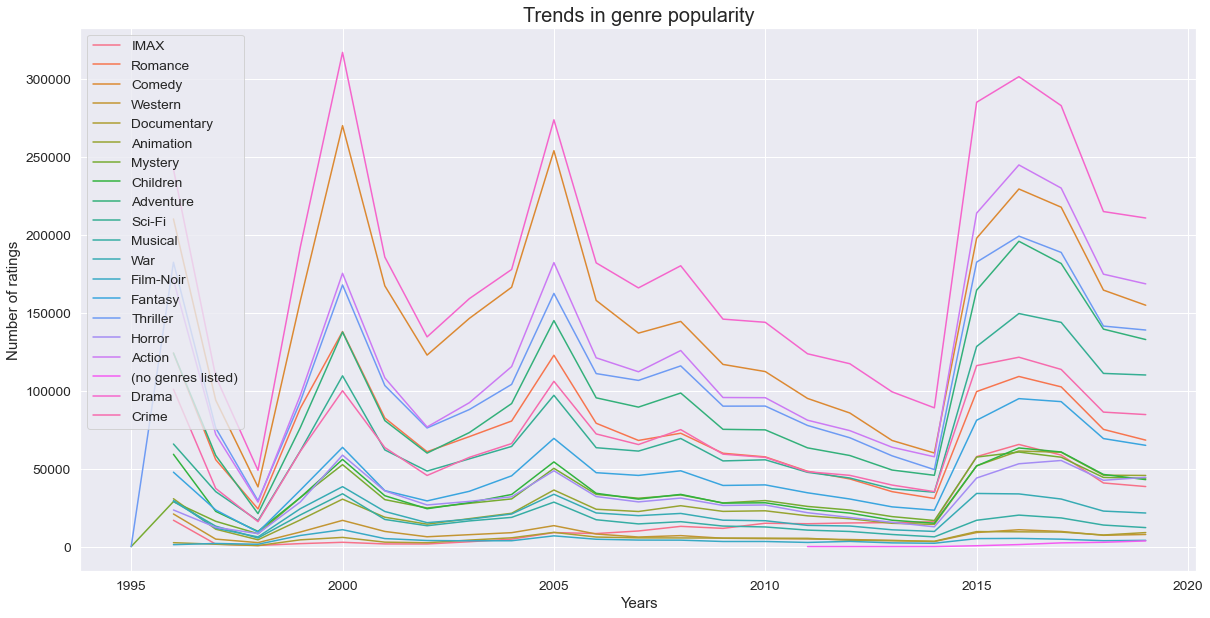

In [25]:
def most_watched(input_df):  
    """"
    This function creates a plot showing the popularity of each genre 
    over the last 50 years.
    
    """   
    # Create a copy of the input dataframe and merge it to the movies dataframe
    df = input_df.copy()
    df = df.merge(movies_df,on='movieId',how='left')
    
    # Create an empty dataframe
    b = pd.DataFrame()
    
    # Extract the timestamps and genres 
    timestamps = [timestamp for timestamp in df.timestamp]
    all_genres = set(','.join([genres.replace('|',',') for genres in df.genres]).split(','))
    
    # Get the number of ratings for each genre for each year since 1970
    for index,genre in enumerate(all_genres):
        a = pd.Series([int((timestamps[i]/31536000)+1970) for i,x in enumerate(df.genres) if genre in x])
        a = a.value_counts()
        b = pd.concat([b,pd.DataFrame({genre:a})],axis=1)
    
    # Plot the trends for each genre on the same line graph 
    plt.figure(figsize=(20,10))
    plot = sns.lineplot(data=b, dashes=False)
      
    # Add plot labels
    plt.title('Trends in genre popularity',fontsize=20)
    plt.xlabel('Years', fontsize=15)
    plt.ylabel('Number of ratings', fontsize=15)
    
    plt.show()
    
    return

most_watched(train_df)

According to this graph the most popular genres are the Drama and comedy,with drama being the most popular at all times since 1995.

__Movies Per Year__

The dataset has 48213 movies avalable to us. it is reasonable to assume that it does include almost every major film released during those years with this assumptions in mind, let us take a look at the number of movies produced by the year.

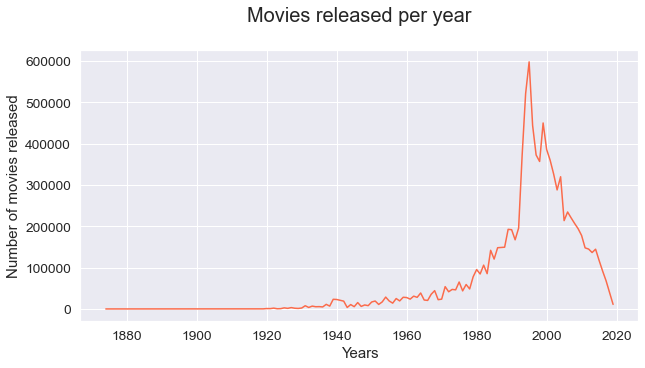

In [26]:
# Extract the release year fron the movie titles
ratings['release_year'] = ratings.title.map(lambda x: re.findall('\d\d\d\d', x))
ratings.release_year = ratings.release_year.apply(lambda x: np.nan if not x else int(x[-1]))
years =  pd.DataFrame(ratings.groupby(['release_year'])['title'].count())
years.rename(columns={'title':'movies released'}, inplace=True)

# Plot the number of movies released per year
plt.figure(figsize=(10,5))
plot = sns.lineplot(data=years, dashes=False, legend=False, palette='Reds_r')

# Add figure labels
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of movies released', fontsize=15)
plt.title('Movies released per year\n', fontsize=20)

plt.show() 

It is observed that most movies were released as we approached 2000 and reached at their peak during the 1990's,This could be because the increase in technological advancements like the introduction of motion picture projectors and more people having access to the entertainment in theatres.

__Who are the most common directors__

In [27]:
def count_directors(df, count = 10):
    
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)
directors = count_directors(imdb_df)

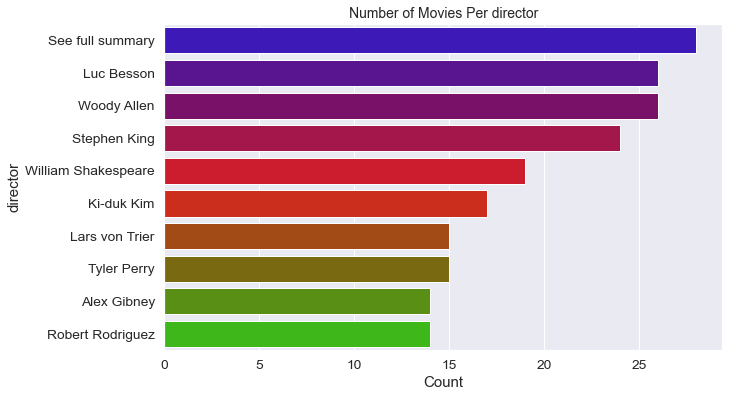

In [28]:
feature_count(directors.head(10), 'director')

see full summary is not a director ,we can use IMDB API to retrieve this data,so Luc Besson and woody Allen can be seen as the most common directors.We could also use a word cloud to show the same while remove the 'see full summary'.

In [67]:
imdb_df['director'] = imdb_df.director.astype(str)
# Removing spaces between names
imdb_df['director'] = imdb_df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))

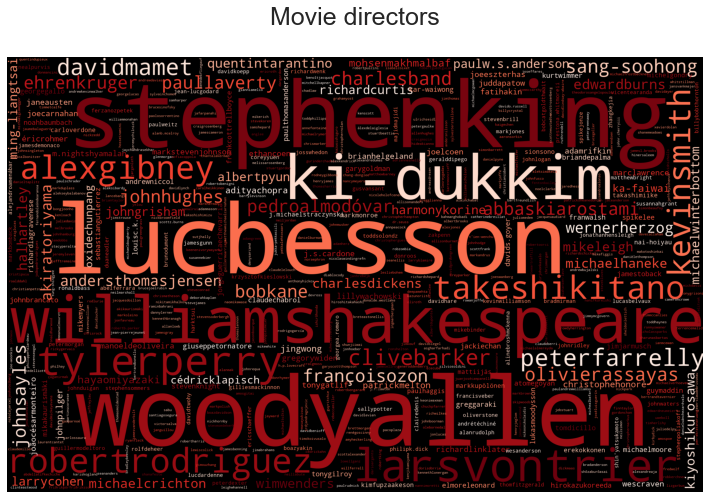

In [68]:
def wordcloud_generator(df, column):  
    
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be ignored
    ignore = ['nan', ' nan', 'nan ', 'seefullsummary', ' seefullsummary', 'seefullsummary ']
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in ignore]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
       
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=2000,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Reds').generate_from_frequencies(words)

    return wordcloud 

# Generate a WordCloud using the movie directors  
directors = wordcloud_generator(imdb_df, 'director')

# Plot the WordCloud 
f = plt.figure(figsize=(20, 8)) 
plt.imshow(directors) 
plt.axis('off') 
plt.title('Movie directors\n', fontsize=25)
plt.show()

as seen earlier,Lucbesson,Stephen King,Woodyallen,Ki-dukkim and William Shakepeare are the most popular directors based on the number of films in the database that they have directed.Stephen King and william Shakespear are both writers and not directors but lots of films have been made based on their books.

we could also try and see the the most popular directors based on their ratings.we will do this by calculating the mean rating for each director to determine the most popular.

## 8. Data Preprocessing


### Handling Missing Values

Before making any decision on how to impute missing values there are aspects we need to investigate which will act as a guide on how to impute the datapoints we currently do not have, we need to look into wether or not the real occurance of the missing values is a question of mishandled data or could it be that the event didn't occur and once that is established we can find the effective method to impute the missing values without changing the underlying information of the data.

the following columns in the IMDB database have missing values that must be dealt with:

* title_cast =36.9% 
* director = 36.2%
* runtime = 44.32%
* budget = 71.02%
* plot_keywords = 40.6%

### Multidimensional Scaling
Multidimensional scaling (MDS) is a technique for visualizing distances between objects on a map, where the distance is known between pairs of the objects.  


In [112]:
# Subset the data to cut down computation time for now
genome_scores = genome_score[:10000000]

In [113]:
scaler_mds = StandardScaler()
mds_genome = scaler_mds.fit_transform(genome_score.sample(frac=0.0001))

In [121]:
tsne = TSNE(3, n_jobs = -1, verbose = 2, perplexity = 10, learning_rate = 0.1)

In [122]:
tsne.fit(mds_genome)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1558 samples in 0.810s...
[t-SNE] Computed neighbors for 1558 samples in 3.816s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1558
[t-SNE] Computed conditional probabilities for sample 1558 / 1558
[t-SNE] Mean sigma: 0.105218
[t-SNE] Computed conditional probabilities in 0.449s
[t-SNE] Iteration 50: error = 89.6830139, gradient norm = 0.0000397 (50 iterations in 2.227s)
[t-SNE] Iteration 100: error = 89.6830139, gradient norm = 0.0000049 (50 iterations in 1.106s)
[t-SNE] Iteration 150: error = 89.6830139, gradient norm = 0.0000027 (50 iterations in 1.049s)
[t-SNE] Iteration 200: error = 89.6830139, gradient norm = 0.0000038 (50 iterations in 0.989s)
[t-SNE] Iteration 250: error = 89.6830139, gradient norm = 0.0000072 (50 iterations in 0.943s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.683014
[t-SNE] Iteration 300: error = 4.9886990, gradient norm = 0.0000109 (50 iterations in 0.973s)

TSNE(learning_rate=0.1, n_components=3, n_jobs=-1, perplexity=10, verbose=2)

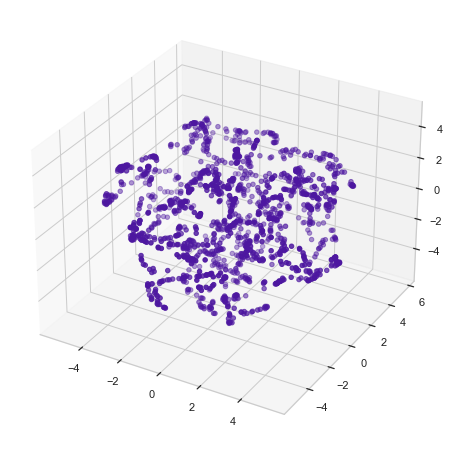

In [124]:
#Axes3D

fig = plt.figure(figsize=(15, 8))

# Add 3D scatter plot
ax = fig.add_subplot(projection='3d')
ax.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], tsne.embedding_[:,2], color='#4D17A0')
plt.show()

## 8. Build Recommendation Model

### 8.1 Content Based Filtering

Content-based filtering, also referred to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document . In the following section, the model uses 'title_cast', 'director', 'plot_keywords'and 'genres' to recommend similar movies based on input from a user. The model was not used to predict ratings for the testing data, as it is too computationally expensive.

* Item level data source -
you need a strong source of data associated to the attributes of the item. The more information you know regarding the item, the more beneficial it will be for your system.

* User level data source -
you need some sort of user feedback based on the item you’re providing recommendations for. This level of feedback can be either implicit or explicit.  The more user feedback you can track, the more beneficial it will be for your system.

selecting features of interest for modelling

In [19]:
df = imdb_df[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies_df[['movieId', 'genres', 'title']], on='movieId', how='inner')
#Add colummn for release year
df['year'] = df['title'].str.extract(r"\((\d+)\)", expand=False)
df.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),1995
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995),1995
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995),1995
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995),1995
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995),1995


In [12]:
def data_preprocessing(subset_size):
    """Prepare data for use within Content filtering algorithm.

    """
    # Split genre data into individual words.
    movies['keyWords'] = movies['genres'].str.replace('|', ' ')
    # Subset of the data
    movies_subset = movies[:subset_size]
    return movies_subset
 
def content_model(movie_list,top_n=10): 
    """Performs Content filtering based upon a list of movies supplied
       by the app user.

    """
    # Initializing the empty list of recommended movies
    data = data_preprocessing(2000)
    # Instantiating and generating the count matrix
    count_vec = CountVectorizer()
    count_matrix = count_vec.fit_transform(data['keyWords'])
    indices = pd.Series(data['title'])
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    cosine_sim = pd.DataFrame(cosine_sim, index = data.index, columns = data.index)
    # Getting the index of the movie that matches the title
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]
    # Calculating the scores
    score_series_1 = pd.Series(rank_1).sort_values(ascending = False)
    score_series_2 = pd.Series(rank_2).sort_values(ascending = False)
    score_series_3 = pd.Series(rank_3).sort_values(ascending = False)
    # Getting the indexes of the 10 most similar movies
    listings = score_series_1.append(score_series_2).append(score_series_3).sort_values(ascending = False)
    # Store movie names
    recommended_movies = []
    # Appending the names of movies
    top_50_indexes = list(listings.iloc[1:50].index)
    # Removing chosen movies
    top_indexes = np.setdiff1d(top_50_indexes,[idx_1,idx_2,idx_3])
    for i in top_indexes[:top_n]:
        recommended_movies.append(list(movies['title'])[i])
    return recommended_movies

In [18]:
movies = movies_df.dropna()
movie_list = ['Ice Age (2002)','Ace Ventura: When Nature Calls (1995)','Father of the Bride Part II (1995)']
content_model(movie_list,top_n=20)

IndexError: index 0 is out of bounds for axis 0 with size 0

### 8.2 Collaborative Filtering

The collaborative filtering approach builds models based on user’s past behaviors as well as similar decisions made by other users. This model is used to predict items (or ratings for items) that the user may have an interest in. Within collaborative filtering, there are two well-known distinct approaches:
​
- Memory-Based: models calculate the similarities between users / items based on user-item rating pairs.
- Model-Based: models use some sort of machine learning algorithm to estimate the ratings

In our modelling we're going to use the surprise package. Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. The name SurPRISE stands for Simple Python RecommendatIon System Engine.

Surprise allows us to use a built-in datasets, Movielens. We'll use this data to run experiments on with different models before we decide on a model and use it on our own data.

#### 8.2.1 Singular Value Decomposition (SVD)


The Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations. It also has some important applications in data science.

In [31]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

#time the experiment
start = timeit.default_timer()

# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
SVD_RMSE = accuracy.rmse(predictions)
print('SVD_RMSE = ' + str(SVD_RMSE))

#Calculate + print experiment time
stop = timeit.default_timer()
execution_time_SVD = round((stop - start), 2)
print("Program Executed in "+str(execution_time_SVD) + " seconds") # It returns time in seconds

RMSE: 0.9369
SVD_RMSE = 0.9368845223212123
Program Executed in 11.28 seconds


In [32]:
from surprise import SVDpp

#time the experiment
start = timeit.default_timer()

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the SVD++ algorithm here
algo = SVDpp()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
SVDpp_RMSE = accuracy.rmse(predictions)
print('SVDpp_RMSE = ' + str(SVDpp_RMSE))

#Calculate + print experiment time
stop = timeit.default_timer()
execution_time_SVDpp = stop - start
print("Program Executed in "+str(execution_time_SVDpp) + " seconds") # It returns time in seconds

RMSE: 0.9142
SVDpp_RMSE = 0.9142495651199216
Program Executed in 777.8282654999985 seconds


In [34]:
# Run on the subset of the train data to illustrate the model performance 
train_df = pd.read_csv('train.csv')

model_testing_df = train_df

In [38]:
#our training data
df = pd.DataFrame(model_testing_df)
del df['timestamp']


# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [36]:
#allows us to train on the whole dataset
trainset = data.build_full_trainset()

#SVD algorithm.
algo = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

In [37]:
predictions = algo.test(testset)

# Then compute RMSE
SVD_RMSE = accuracy.rmse(predictions)
SVD_RMSE 

RMSE: 1.1216


1.1215752015807945

In [39]:
#allows us to train on the whole dataset
trainset = data.build_full_trainset()
algo1 = SVDpp()
algo1.fit(trainset)
predictions = algo1.test(testset)

# Then compute RMSE
SVDpp_RMSE = accuracy.rmse(predictions)
print('SVDpp_RMSE = ' + str(SVDpp_RMSE))

#Calculate + print experiment time
stop = timeit.default_timer()
execution_time_SVDpp = stop - start
print("Program Executed in "+str(execution_time_SVDpp) + " seconds") # It returns time in seconds

RMSE: 1.1216
SVDpp_RMSE = 1.1215752015807945
Program Executed in 3505.1428289999985 seconds


In [45]:
train_df = pd.read_csv('./train.csv')

# remove outlier in userID in train_df
display(train_df.info())
display(train_df.head(3))

train_df.drop(train_df.index[train_df['userId'] == 72315], inplace=True)

train_df = train_df.reset_index(drop=True)

#use a subset of the train data to illustrate the model performance 
model_testing_df = train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


None

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


In [46]:
#our training data
df = pd.DataFrame(model_testing_df)
del df['timestamp']


# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [ ]:
#packages we need
from surprise import accuracy
from surprise.model_selection import train_test_split

#allows us to train on the whole dataset
trainset = data.build_full_trainset()

#SVD algorithm.
algo = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

In [ ]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# Use the SVD algorithm.
#algo2 = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
predictions = algo.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

In [42]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# Use the SVD algorithm.
algo2 = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
predictions = algo2.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9341


0.9340857047605078

In [43]:
#packages we need
from surprise import accuracy
from surprise.model_selection import train_test_split

#allows us to train on the whole dataset
trainset = data.build_full_trainset()

#SVD algorithm.
algo = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

In [44]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# Use the SVD algorithm.
algo2 = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
predictions = algo2.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9363


0.9363442129191409